# Regression of Airbnb Prices
<b>Introduction:</b>
We all know that Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences since 2008. As NYC is the most populous city in the United States and also one of the most popular tourism and business place in the world, we would like to choose the best prediction model for the price




## Descriptive information for the study and the dataset:
<b>Link:</b> https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data <br>
<br><b>Study Implications:</b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content:

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements:

This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration:

What can we learn about different hosts and areas?
What can we learn how well we can makes predictions on the price of the airbnb rooms. <br>
<br>
<br>
### Data Description: 
#### Input Variables:
><b>Demographic Variables:</b> <br>
1 id <br>
2 name Categorical <br>
3 host_id Numeric <br>
4 host_name Categorical <br>
5 neighbourhood_group Categorical <br>
6 neighbourhood Categorical <br>
7 latitude Numeric <br>
8 longitude Numeric <br>
9 room_type Categorical <br>
10 price Numeric <br>
11 minimum_nights Numeric <br>
12 number_of_reviews Numeric <br>
13 last_review Datetime <br>
14 reviews_per_month Numeric <br>
15 calculated_host_listings_count Numeric <br>
16 availability_365 Numeric <br>
<br>
#### Output variable (Target Variable):
>16 - y - is the price of the Airbnb ) <br>


In [23]:
#Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [24]:
import os
os


<module 'os' from '/Users/sandeepgautam/opt/anaconda3/lib/python3.8/os.py'>

In [25]:
df=pd.read_csv('/Users/sandeepgautam/Downloads/archive/AB_NYC_2019.csv')
df.head()
df.neighbourhood_group.value_counts()
df.info()

    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

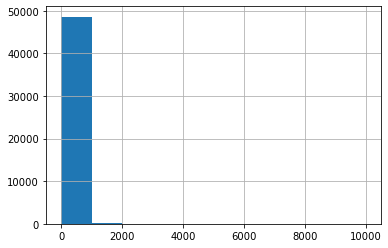

In [26]:
hist_price=df["price"].hist()


In [27]:
df[df['room_type']=='Entire home/apt'].price.describe()


count    25409.000000
mean       211.794246
std        284.041611
min          0.000000
25%        120.000000
50%        160.000000
75%        229.000000
max      10000.000000
Name: price, dtype: float64

* We slected Airbnb with price less than 250 dollars because houses with price more than 250 might have various other factor effecting it like design, lavishness, extra facilities like pools, movie hall. Since we don't have those information these data will have acted as a outliers



In [28]:
df=df[df["price"]<250]


In [29]:

df.shape

(42669, 16)

> Dropping Unnecessary-columns 
###  Columns:id','name','host_id','host_name','last_review doesn't add value in our regression

In [30]:
for i in ['id','name','host_id','host_name','last_review']:
    df.drop([i],axis=1,inplace=True)

df.info()


        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42669 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             42669 non-null  object 
 1   neighbourhood                   42669 non-null  object 
 2   latitude                        42669 non-null  float64
 3   longitude                       42669 non-null  float64
 4   room_type                       42669 non-null  object 
 5   price                           42669 non-null  int64  
 6   minimum_nights                  42669 non-null  int64  
 7   number_of_reviews               42669 non-null  int64  
 8   reviews_per_month               34584 non-null  float64
 9   calculated_host_listings_count  42669 non-null  int64  
 10  availability_365                42669 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.9+ MB


In [31]:
df.dropna(axis=0, how='any',inplace=True)
df.shape

(34584, 11)

## Heat map to get the basic understanding of the correlation in columns

<AxesSubplot:>

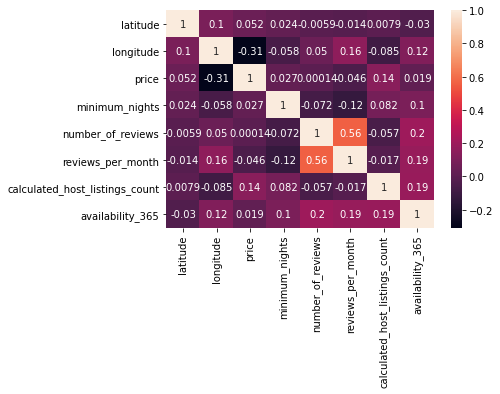

In [32]:
import seaborn as sn

sn.heatmap(df.corr(), annot=True)


# Randomly making 5% of the data as np.nan

> 5% of the values will be randomly imputed as np.nan values

In [33]:
df.head()
temp=df.neighbourhood
temp2=df.neighbourhood_group

* We choose not to make neighbourhood and neighbourhood_group to be nan becasue we are using this information to impute other value. Plus we have already removed the rows with neighbourhood and neighbourhood_group as nan from the original dataset

In [34]:
df=df.iloc[:,df.columns!='neighbourhood']
df=df.iloc[:,df.columns!='neighbourhood_group']




In [35]:
nan_mat = np.random.random(df.shape)<0.07
nan_mat.shape

(34584, 9)

In [36]:
nan_mat.sum()


21580

In [37]:
dfn = df.mask(nan_mat)
dfn.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34584 entries, 0 to 48852
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        32189 non-null  float64
 1   longitude                       32258 non-null  float64
 2   room_type                       32106 non-null  object 
 3   price                           32192 non-null  float64
 4   minimum_nights                  32186 non-null  float64
 5   number_of_reviews               32195 non-null  float64
 6   reviews_per_month               32160 non-null  float64
 7   calculated_host_listings_count  32167 non-null  float64
 8   availability_365                32223 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.6+ MB


In [38]:
dfn=dfn.join(temp)
dfn=dfn.join(temp2)



>  5% of new data frame is nan


In [39]:

nnan = dfn.isnull().sum().sum()
ntot = dfn.shape[1]*dfn.shape[0]
percent_nan = nnan/ntot

print(percent_nan)

0.05672617921056505


### Export new copy of data with 5% NaN
><b>Named:</b> updated_airbnbdata.csv

In [40]:
dfn.to_csv('updated_airbnbdata.csv')

In [41]:
dfn.isna().sum()

latitude                          2395
longitude                         2326
room_type                         2478
price                             2392
minimum_nights                    2398
number_of_reviews                 2389
reviews_per_month                 2424
calculated_host_listings_count    2417
availability_365                  2361
neighbourhood                        0
neighbourhood_group                  0
dtype: int64

# Imputation
##  Data Preprocessing and Preparation for ML Regression Algorithms:

> Strategy for imputing Latitude & longitude: Latitude,longitude are highly related with the neighbourhood so we will impute these columns with mean of each neighbourhood



In [42]:
for i in ['latitude', 'longitude']:
    dfn[i]=dfn[i].fillna(dfn.groupby('neighbourhood')[i].transform('mean'))



* Becuase latitute and longitute information cannot be normalized we converted the latitude and longitude to radians instead of degrees which will basically represent the same thing but in a different unit

In [43]:
#i=pd.DataFrame(c)
dfn["latitude"]=np.radians(dfn["latitude"])
dfn["longitude"]=np.radians(dfn["longitude"])

## Imputing room_type with the mode room_type of the particlar neighbourhood 
* The reason is because the unkwown room type has high chance of being similar to the most repitative room type in a particular area

> Imputing in this way because there was some technical issue imputing in the simple manner

In [44]:
c=[]
for i,ii in zip(dfn['room_type'],dfn['neighbourhood']):
    b=[]
    if i=='Entire home/apt':
        c.append("Entire home")
    if i=="Private room":
        c.append("Private room")
    if i=='Shared room':
        c.append("Shared room")
    if i!='Entire home/apt':
        if i!='Private room':
            if i!='Shared room':
                b=dfn[dfn['neighbourhood']==ii].room_type.mode()[0]
                c.append(b)



In [45]:
dfn['room_type_new']=c


In [46]:
dfn=dfn.drop('room_type',axis=1)
dfn.head(1)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,neighbourhood_group,room_type_new
0,0.709433,-1.291061,NaN,1.0,9.0,0.21,6.0,365.0,Kensington,Brooklyn,Private room


In [47]:
dfn['room_type_new'].value_counts()

Private room       17585
Entire home        15214
Entire home/apt     1012
Shared room          773
Name: room_type_new, dtype: int64

In [48]:
dfn['room_type_new'].replace('Entire home/apt','Entire home',inplace=True)

In [49]:
dfn['room_type_new'].value_counts()

Private room    17585
Entire home     16226
Shared room       773
Name: room_type_new, dtype: int64

# Imputing the price columns on the basic of room type and neighbourhood
* Room of similar type in similar location tend to have similar prices

In [50]:

for i in ['price','reviews_per_month', 'longitude','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']:
    dfn[i]=dfn[i].fillna(dfn.groupby(['neighbourhood','room_type_new'])[i].transform('mean'))



#dfn['price']=dfn['price'].fillna(dfn.groupby(['neighbourhood','room_type_new'])['price'].transform('mean'))

#dfn.groupby(['neighbourhood','room_type_new']).mean()

> Removing some rows that didn't get imputed because of some complexity in the data, since we are working with 30k plus data, removing 15 rows wouldn't make any difference

In [51]:
dfn.isna().sum()

latitude                          0
longitude                         1
price                             5
minimum_nights                    2
number_of_reviews                 2
reviews_per_month                 4
calculated_host_listings_count    3
availability_365                  5
neighbourhood                     0
neighbourhood_group               0
room_type_new                     0
dtype: int64

In [52]:
dfn=dfn.dropna(how='any')


In [53]:
dfn.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,neighbourhood_group,room_type_new
0,0.709433,-1.291061,59.060976,1.0,9.0,0.21,6.0,365.0,Kensington,Brooklyn,Private room
1,0.711285,-1.291260,225.000000,1.0,45.0,0.38,2.0,355.0,Midtown,Manhattan,Entire home
3,0.710090,-1.290841,89.000000,1.0,270.0,4.64,1.0,194.0,Clinton Hill,Brooklyn,Entire home
4,0.712068,-1.290566,80.000000,10.0,9.0,0.10,1.0,0.0,East Harlem,Manhattan,Entire home
5,0.711181,-1.291107,200.000000,3.0,74.0,0.59,1.0,129.0,Murray Hill,Manhattan,Entire home


## Preprocessing Data for ML Regression Algorithms

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data=dfn
data

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,neighbourhood_group,room_type_new
0,0.709433,-1.291061,59.060976,1.0,9.0,0.21,6.000000,365.0,Kensington,Brooklyn,Private room
1,0.711285,-1.291260,225.000000,1.0,45.0,0.38,2.000000,355.0,Midtown,Manhattan,Entire home
3,0.710090,-1.290841,89.000000,1.0,270.0,4.64,1.000000,194.0,Clinton Hill,Brooklyn,Entire home
4,0.712068,-1.290566,80.000000,10.0,9.0,0.10,1.000000,0.0,East Harlem,Manhattan,Entire home
5,0.711181,-1.291107,200.000000,3.0,74.0,0.59,1.000000,129.0,Murray Hill,Manhattan,Entire home
...,...,...,...,...,...,...,...,...,...,...,...
48782,0.711763,-1.290735,129.000000,1.0,1.0,1.00,1.000000,147.0,Upper East Side,Manhattan,Private room
48790,0.711240,-1.288308,63.076923,1.0,1.0,1.00,4.334677,339.0,Flushing,Queens,Private room
48799,0.707588,-1.294035,235.000000,1.0,1.0,1.00,1.000000,87.0,Great Kills,Staten Island,Entire home
48805,0.712232,-1.290217,100.000000,1.0,2.0,2.00,1.000000,40.0,Mott Haven,Bronx,Private room


In [55]:
one_hot=pd.get_dummies(data['neighbourhood_group'])
one_hot=one_hot.add_prefix('Neighb-group_')
data=data.join(one_hot)
data=data.drop('neighbourhood_group',axis=1)
data.head()





one_hot=pd.get_dummies(data['room_type_new'])
one_hot=one_hot.add_prefix('Room_')
data=data.join(one_hot)
data=data.drop('room_type_new',axis=1)
data.head()



#one_hot=pd.get_dummies(data['neighbourhood'])
#one_hot=one_hot.add_prefix('Neighd_')
#data=data.join(one_hot)
#data=data.drop('neighbourhood',axis=1)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,Neighb-group_Bronx,Neighb-group_Brooklyn,Neighb-group_Manhattan,Neighb-group_Queens,Neighb-group_Staten Island,Room_Entire home,Room_Private room,Room_Shared room
0,0.709433,-1.291061,59.060976,1.0,9.0,0.21,6.0,365.0,Kensington,0,1,0,0,0,0,1,0
1,0.711285,-1.291260,225.000000,1.0,45.0,0.38,2.0,355.0,Midtown,0,0,1,0,0,1,0,0
3,0.710090,-1.290841,89.000000,1.0,270.0,4.64,1.0,194.0,Clinton Hill,0,1,0,0,0,1,0,0
4,0.712068,-1.290566,80.000000,10.0,9.0,0.10,1.0,0.0,East Harlem,0,0,1,0,0,1,0,0
5,0.711181,-1.291107,200.000000,3.0,74.0,0.59,1.0,129.0,Murray Hill,0,0,1,0,0,1,0,0


In [56]:
data=data.dropna(how='any')
data.isna().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood                     0
Neighb-group_Bronx                0
Neighb-group_Brooklyn             0
Neighb-group_Manhattan            0
Neighb-group_Queens               0
Neighb-group_Staten Island        0
Room_Entire home                  0
Room_Private room                 0
Room_Shared room                  0
dtype: int64

> one hot encoding the categorical data
## Dropping neighbourbood columns as the information is precisely mentioned in latitute and longitute columns


In [57]:
data=data.drop('neighbourhood',axis=1)
data.head()



,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Neighb-group_Bronx,Neighb-group_Brooklyn,Neighb-group_Manhattan,Neighb-group_Queens,Neighb-group_Staten Island,Room_Entire home,Room_Private room,Room_Shared room
0,0.709433,-1.291061,59.060976,1.0,9.0,0.21,6.0,365.0,0,1,0,0,0,0,1,0
1,0.711285,-1.291260,225.000000,1.0,45.0,0.38,2.0,355.0,0,0,1,0,0,1,0,0
3,0.710090,-1.290841,89.000000,1.0,270.0,4.64,1.0,194.0,0,1,0,0,0,1,0,0
4,0.712068,-1.290566,80.000000,10.0,9.0,0.10,1.0,0.0,0,0,1,0,0,1,0,0
5,0.711181,-1.291107,200.000000,3.0,74.0,0.59,1.0,129.0,0,0,1,0,0,1,0,0


In [58]:
data.shape


(34565, 16)

In [59]:
y=data.price
X=data.iloc[:,data.columns!='price']


## Scalling the data

In [60]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()



In [61]:
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Random Forest  with grid search


In [62]:
param_grid={'max_depth': list(range(1, 15))}


from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0)



from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5,return_train_score=True,iid=False,n_jobs=-1)

grid_search.fit(X_train,y_train)

grid_search.best_params_,grid_search.best_score_


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 12}, 0.5726615766155122)

In [63]:
# RandomForest with the best predictor
Rsquare_train_RandomForest=grid_search.best_score_
c=grid_search.best_params_
rf_reg=RandomForestRegressor(**c,random_state=0)
rf_reg.fit(X_train,y_train)
rf_reg_pred=rf_reg.predict(X_test)


# KNeighborsRegressor

> Scaled data will be used in Kneighbours because without scalling some columns might have much more impact while calculating distance than other columns 

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor




model=KNeighborsRegressor()
param_grid={'n_neighbors': list(range(1,30))}
grid_search = GridSearchCV(model, param_grid, cv=5,return_train_score=True,iid=False,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'n_neighbors': 29}, 0.5447400692433902)

In [65]:
# Kneighbour with the best parameter

In [97]:
5

5

In [66]:
c=grid_search.best_params_
Rsquare_train_KNeighborsRegressor=grid_search.best_score_
knn_reg = KNeighborsRegressor(**c)
knn_reg.fit(X_train, y_train)
knn_pred= knn_reg.predict(X_test)



# Linear regression

> There is no need to scale the data for the linear regression because we will get the same result in both cases

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print('Train score')
print(reg.score(X_train, y_train))
print('Test score')
print(reg.score(X_test, y_test))




Train score
0.5027489982630755
Test score
0.5015338442569903


In [68]:
lreg_pred= reg.predict(X_test)
Rsquare_train_Linearregression=reg.score(X_train, y_train)


# Ridge regression

> We use Scaled data for both Ridge and Lasso because it will take less time for the gradient(derivative) to reach to the minimum value 

In [69]:

from sklearn.linear_model import Ridge

train_score_list = []
test_score_list = []

for alpha in [0.01, 0.1, 1, 10, 100,500]: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,  y_train)
    train_score_list.append(ridge.score(X_train, y_train))
    test_score_list.append(ridge.score(X_test, y_test))

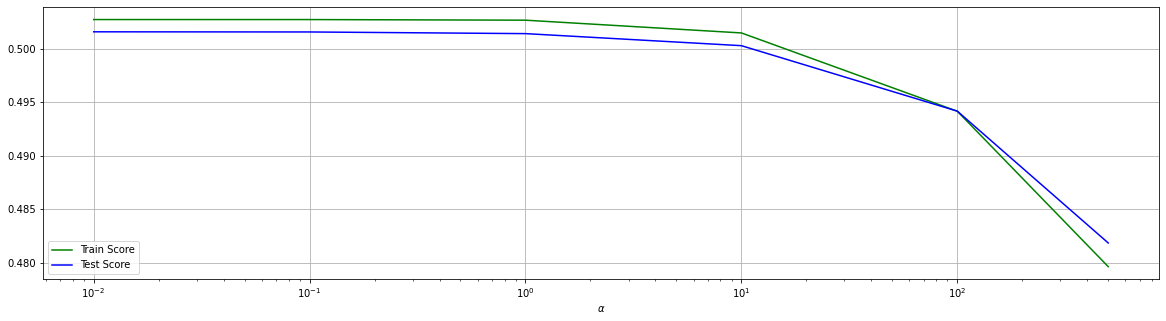

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100,500]

plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [71]:
from  sklearn.linear_model import Ridge

ridge = Ridge(0.01)
ridge.fit(X_train,  y_train)

ridge_pred= ridge.predict(X_test)

In [72]:
Rsquare_train_Ridge=ridge.score(X_train,  y_train)

# Lasso


In [73]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

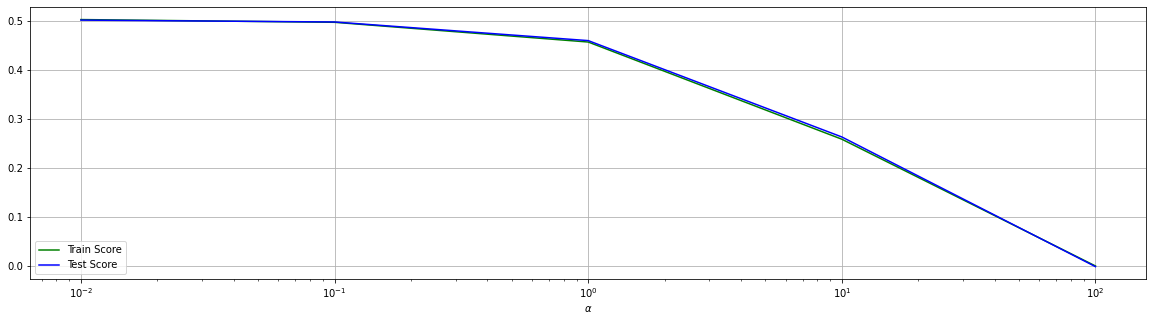

In [74]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [75]:
lasso = Lasso(0.01)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
Rsquare_train_lasso=lasso.score(X_train,  y_train)


# Polynomial regression

In [76]:
train_score_list = []
test_score_list = []
x_range=list(range(1,5))


from  sklearn.preprocessing  import PolynomialFeatures
for i in range(1,5):
    poly = PolynomialFeatures(degree = i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    train_score_list.append(poly_reg.score(X_train_poly, y_train))
    test_score_list.append(poly_reg.score(X_test_poly, y_test))
    


    

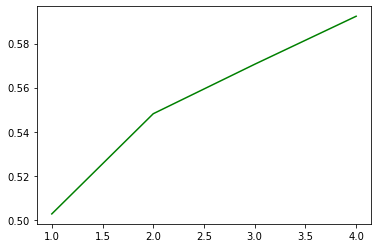

In [77]:

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')



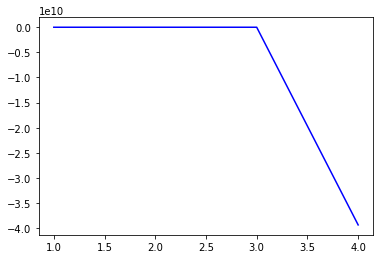

In [78]:
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')


* Since the test r square are negatives, There is no proof that polynomial is going to work in the unseen model. it  is clearly overfitting

# SGD Regressor


In [79]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(random_state=0,learning_rate='constant')


param_grid = {'eta0': [0.001, 0.01, 0.1],

              'max_iter': [1000,5000, 10000]}


from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5,return_train_score=True,iid=False,n_jobs=-1)

grid_search.fit(X_train,y_train)

grid_search.best_params_,grid_search.best_score_

/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'eta0': 0.001, 'max_iter': 1000}, 0.49973482781627754)

In [80]:
Rsquare_train_SGD=grid_search.best_score_
c=grid_search.best_params_
model=SGDRegressor(**c)
model.fit(X_train,y_train)
SGDRegressor_predict=model.predict(X_test)


/Users/sandeepgautam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


>  For SVR, the feature/variable(s) has to be normalized as the C-value which controls the model complexity is over the feature/variable

# SVM

In [81]:
from sklearn.svm import SVR
random_state=0
SVR=SVR()
SVR.fit(X_train,y_train)
print("Train score")
print(SVR.score(X_train,y_train))


print("Test score :")
print(SVR.score(X_test,y_test))




Train score
0.5094694972753289
Test score :
0.5133243931206086


### Grid Search:
>Grid Search employs a cross-validation technique using various folds of the data. Earlier, naive grid search was employed, but in the following section, the Grid Search function is employed from sklearn. This function is useful for multiple reasons, but specifically because it automatically uses cross-validation using a simple hyper-parameter, cv. I set cv=5, so it will split the data into 5 different folds. 

# DecisionTreeRegressor with GridSearchCV to find out the best hyperparameter

In [82]:
from sklearn.tree import DecisionTreeRegressor

dtm = DecisionTreeRegressor(random_state=0)

param_grid = {"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }



grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5,n_jobs=-1)

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 8], 'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [83]:
c=grid_cv_dtm.best_params_
Rsquare_train_decision_tree=grid_search.best_score_

In [84]:
dtm = DecisionTreeRegressor(**c,random_state=0)
dtm.fit(X_train,y_train)
decision_tree_pred=dtm.predict(X_test)
decision_tree_pred

array([ 60.70118005, 175.5121349 ,  65.96710964, ...,  75.74704317,
        72.24230032, 167.10154982])

# SVR with GRIDSEARCH to find the best hyperparameter

In [85]:
random_state=0
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
model=SVR()





param_grid = {'C': [0.1, 1, 10,100],'kernel':['rbf', 'poly', 'linear'],'gamma':[0.01,0.1,1]}
random_state=0

grid_search = GridSearchCV(model, param_grid, scoring='r2',n_jobs=-1)

grid_search.fit(X_train,y_train)
grid_search.best_params_,grid_search.best_score_



({'C': 100, 'gamma': 1, 'kernel': 'poly'}, 0.5423078791377849)

In [86]:
Rsquare_train_SVR=grid_search.best_score_

In [87]:
c=grid_search.best_params_
SVRModel=SVR(**c)
SVRModel.fit(X_train,y_train)
SVR_predict=SVRModel.predict(X_test)



In [88]:
r2_score(y_train, SVRModel.predict(X_train))

0.5489146036454089

In [89]:
0.5528857294348584

0.5528857294348584

In [90]:
print('-------------KNN Regressor-----------')

print('R2(train) %f' % Rsquare_train_KNeighborsRegressor)
print('R2(test) %f' % r2_score(y_test, knn_pred))
print('RMSE(test): %f'% np.sqrt(mean_squared_error(y_test, knn_pred)))   


print('---------------Linear Regressor---------------------')

print('R2(train) %f' % Rsquare_train_Linearregression)
print('R2(test) %f' % r2_score(y_test, lreg_pred))
print('RMSE(test): %f'% np.sqrt(mean_squared_error(y_test, lreg_pred)))


print('---------------Ridge-----------------------')

print('R2(train) %f' % Rsquare_train_Ridge)
print('R2(test) %f' % r2_score(y_test, ridge_pred))
print('RMSE(test): %f'% np.sqrt(mean_squared_error(y_test, ridge_pred)))


print('---------------Lasso-----------------------')

print('R2(train) %f' % Rsquare_train_lasso)
print('R2(test) %f' % r2_score(y_test, lasso_pred))
print('RMSE(test): %f'% np.sqrt(mean_squared_error(y_test, lasso_pred)))

print('---------------Random Forest-----------------------')

print('R2(train) %f' % Rsquare_train_RandomForest)
print('R2(test) %f' % r2_score(y_test, rf_reg_pred))
print('RMSE(test): %f'% np.sqrt(mean_squared_error(y_test, rf_reg_pred)))


print('---------------DecisionTreeRegressor-----------------------')

print('R2(train) %f' % Rsquare_train_decision_tree)
print('R2(test) %f' % r2_score(y_test, decision_tree_pred))
print('RMSE(test): %f'% np.sqrt(mean_squared_error(y_test, decision_tree_pred)))


print('---------------SGDRegressor-----------------------')

print('R2(train) %f' % Rsquare_train_SGD)
print('R2(test) %f' % r2_score(y_test, SGDRegressor_predict))
print('RMSE(test): %f'% np.sqrt(mean_squared_error(y_test, SGDRegressor_predict)))


print('---------------SVR-----------------------')

print('R2(Train) %f' % Rsquare_train_SVR)
print('R2(Test) %f' % r2_score(y_test, SVR_predict))
print('RMSE(Test): %f' % np.sqrt(mean_squared_error(y_test, SVR_predict)))






-------------KNN Regressor-----------
R2(train) 0.544740
R2(test) 0.545526
RMSE(test): 34.462347
---------------Linear Regressor---------------------
R2(train) 0.502749
R2(test) 0.501534
RMSE(test): 36.091751
---------------Ridge-----------------------
R2(train) 0.502762
R2(test) 0.501615
RMSE(test): 36.088809
---------------Lasso-----------------------
R2(train) 0.502533
R2(test) 0.501385
RMSE(test): 36.097139
---------------Random Forest-----------------------
R2(train) 0.572662
R2(test) 0.577253
RMSE(test): 33.237661
---------------DecisionTreeRegressor-----------------------
R2(train) 0.499735
R2(test) 0.545371
RMSE(test): 34.468219
---------------SGDRegressor-----------------------
R2(train) 0.499735
R2(test) 0.497493
RMSE(test): 36.237737
---------------SVR-----------------------
R2(Train) 0.542308
R2(Test) 0.544340
RMSE(Test): 34.507285


* We choose Random Forest as it is giving us the best best R square in both train and test. Plus it also has loweste test RMSE with
> max_depth=10

In [91]:
Bestregressor=RandomForestRegressor(max_depth=12,random_state=0)
Bestregressor.fit(X_train,y_train)
Bestregressor.predict(X_test)



array([ 58.59864306, 189.76166459,  71.80222505, ...,  80.90454349,
        83.00598619, 221.67593945])

In [92]:
Bestregressor.feature_importances_

array([1.18650220e-01, 1.17226129e-01, 2.70842056e-02, 2.56131300e-02,
       3.29574251e-02, 2.49178988e-02, 4.55565919e-02, 3.65949801e-04,
       3.29017665e-04, 3.65899117e-02, 5.21636096e-04, 6.42327501e-05,
       5.61968464e-01, 3.83069570e-03, 4.32449229e-03])

In [93]:
Bestregressor.feature_importances_

array([1.18650220e-01, 1.17226129e-01, 2.70842056e-02, 2.56131300e-02,
       3.29574251e-02, 2.49178988e-02, 4.55565919e-02, 3.65949801e-04,
       3.29017665e-04, 3.65899117e-02, 5.21636096e-04, 6.42327501e-05,
       5.61968464e-01, 3.83069570e-03, 4.32449229e-03])

In [94]:
X.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Neighb-group_Bronx', 'Neighb-group_Brooklyn',
       'Neighb-group_Manhattan', 'Neighb-group_Queens',
       'Neighb-group_Staten Island', 'Room_Entire home', 'Room_Private room',
       'Room_Shared room'],
      dtype='object')

* Understanding which variable had the hig

In [95]:
for name, importance in zip(X_train_org.columns, Bestregressor.feature_importances_):
    print(name, "=", importance)

latitude = 0.11865022006202523
longitude = 0.1172261287444222
minimum_nights = 0.027084205639796945
number_of_reviews = 0.025613130016987864
reviews_per_month = 0.03295742513637655
calculated_host_listings_count = 0.024917898823440195
availability_365 = 0.04555659194555818
Neighb-group_Bronx = 0.000365949800948093
Neighb-group_Brooklyn = 0.00032901766453457344
Neighb-group_Manhattan = 0.03658991172193847
Neighb-group_Queens = 0.0005216360964730355
Neighb-group_Staten Island = 6.423275014684227e-05
Room_Entire home = 0.5619684636005619
Room_Private room = 0.003830695704274323
Room_Shared room = 0.004324492292515687


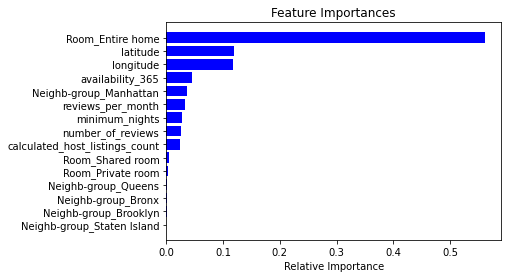

In [96]:
features = X_train_org.columns
importances = Bestregressor.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion
* From the analysis we understand that if the Room type is Entrie home, it is going to have the highest impact in the price which is what we expected
* We also understood that the area where the Airbnb is located is also going to have a high influence in the price
* The next insight we got was that if the house is avialable for more number of days in a year, it is going to be priced high
> Maybe this is because when the house is more avialable, more recent reviews will be there for the customer to see, which increases the demand of the house leading to higher prices. People trust the house more if it has got more reviews
* Houses in the Manhattan neighhood also seems to have more influence in the pric for obvious reason i.e manhattan is relatively expensive area
* For somebody who is looking for AirBnb, based on this data they can look for different house based on how much they can afford
> To get a cheaper Airbnb, they can look for private/shared rooms which is available less or the house which has less number of reviews; meaning houses which are recently added 
<b> And try to avoid area near Manhattan if possible

## However our analysis is completely based on feature importance so these factors may/mayn't have the anticipated influence on the price

* Although random forest is giving us the best model, we will use linear regression just to  understand the feature importance 
> We are removing the latitute and longitute to get a clean analysis

In [228]:
newx=X_train_org.iloc[:,X_train_org.columns!='longitude']
newx=newx.iloc[:,newx.columns!='latitude']



In [232]:
from sklearn.linear_model import LinearRegression
Linearreg = LinearRegression().fit(newx, y_train)
Linearreg.coef_



array([-1.36278774e-01,  4.11166479e-03, -5.23705149e-01,  1.45505319e-01,
        3.15250624e-02, -1.45923614e+01,  7.26838916e+00,  2.90748915e+01,
       -3.03330437e+00, -1.87176149e+01,  5.05482235e+01, -1.18471161e+01,
       -3.87011073e+01])

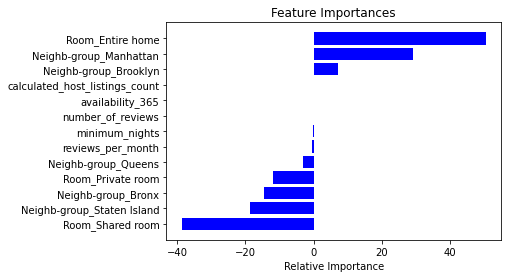

In [234]:
features = newx.columns
importances = Linearreg.coef_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Based on this graph, we see some obvious results like
* Entire houses are expensive 
* Houses in Manhattan and Brookln are expensive wehre as houses in Bronx and Staten Island are not
* And if you have to save some money, live in shared rooms
